# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
# from skimage.exposure import histogram

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


<ipython-input-3-6ff60e4fce56>:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img=rgb2gray(io.imread('./imgs/Picture1.png'))


(160, 137)


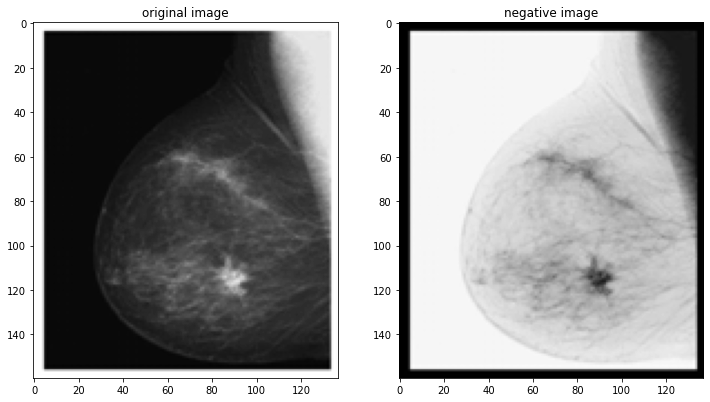

In [3]:
'''
1
Negative Transformation
'''
img=rgb2gray(io.imread('./imgs/Picture1.png'))

print(np.shape(img))

def negativeTransformation(img):
    return np.ones([np.shape(img)[0],np.shape(img)[1]]) - img

show_images([img ,negativeTransformation(img)],['original image','negative image'])

<ipython-input-4-d07998fcc756>:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img=rgb2gray(io.imread('./imgs/Picture2.png'))


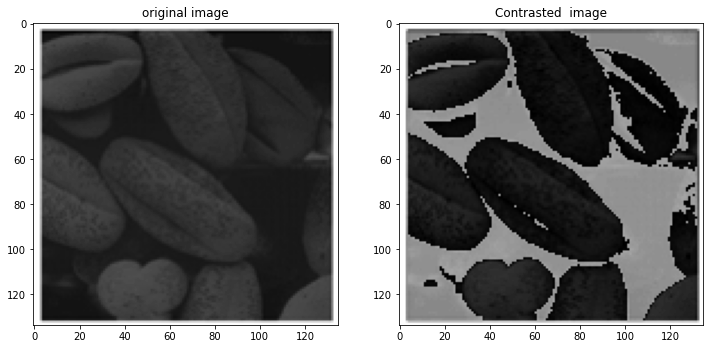

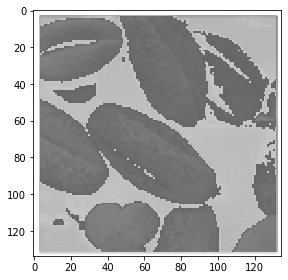

In [4]:
'''
2
Contrast Enhancement
'''
img=rgb2gray(io.imread('./imgs/Picture2.png'))

img *=255
def contrastEnhancement(img):
    img2= np.copy(img)
    img2[((img2 >= 0) & (img2 <= 100))] = img2[((img2 >= 0) & (img2 <= 100))]*1.5 + 50
    return img2
img2 = contrastEnhancement(img.astype(np.uint8))
show_images([img ,img2],['original image','Contrasted  image'])
io.imshow(img2)

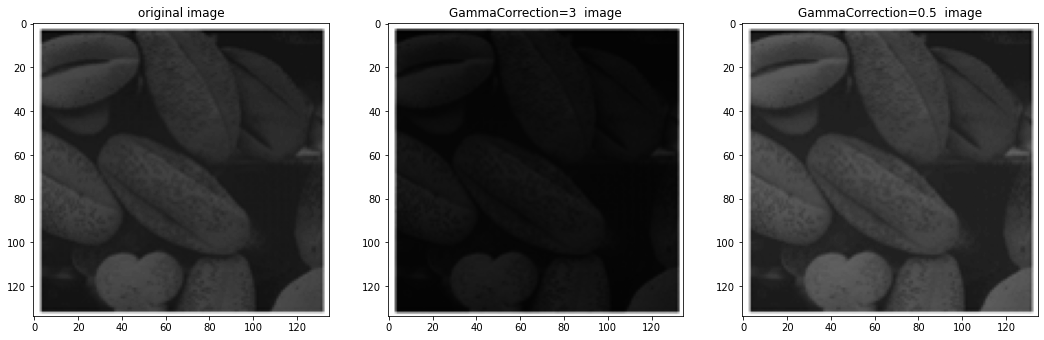

In [5]:
'''
3
Gamma Correction
'''
def GammaCorrection(img,c,Y):
    img2= np.copy(img)
    img2= c*(img**Y)
    return img2

show_images([img ,GammaCorrection(img,1,3),GammaCorrection(img,1,0.5)],['original image','GammaCorrection=3  image','GammaCorrection=0.5  image'])


<ipython-input-6-02e342e9a4d3>:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(io.imread('./imgs/Picture2.png'))


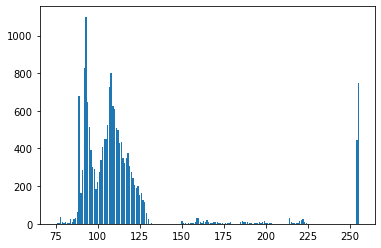

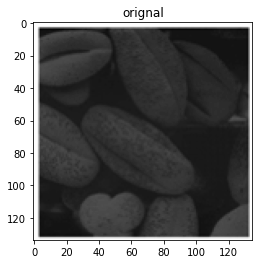

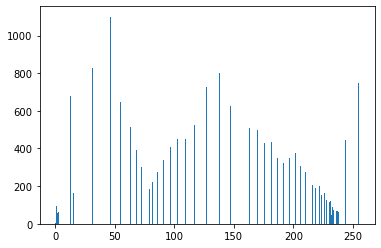

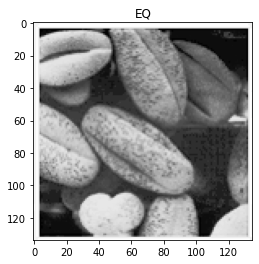

In [6]:

'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

img = rgb2gray(io.imread('./imgs/Picture2.png'))

def getImageWithHist(img,nbins=256):
    H,Hbin =np.histogram(img,nbins,[0,255])
#     H_c=np.zeros(img.max()+1)
    pdf = H / sum(H)
    H_c = np.cumsum(pdf)
    img2 = np.copy(img)
    n , m = np.shape(img)
    for i in range(n):
        for j in range(m):
            img2[i][j]=round(img.max() * H_c[img2[i][j]])
    showHist(img)
    show_images([img],["orignal"])
    showHist(img2)
    show_images([img2],["EQ"])

img *=255        
getImageWithHist(img.astype(np.uint8))

 

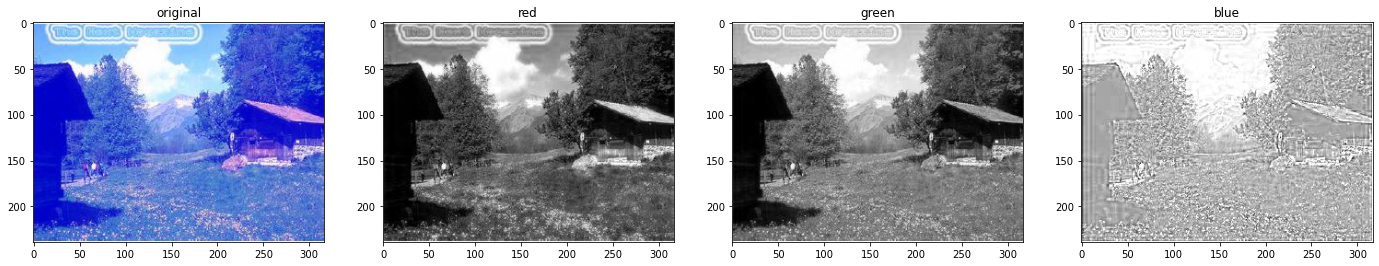

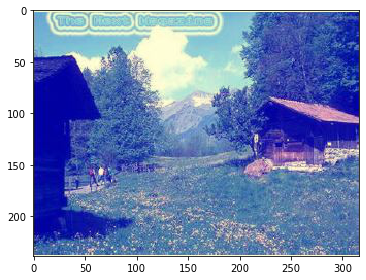

In [8]:
img = io.imread('2.jpg')
red = img[: ,:,0]
green = img[:,:,1]
blue = img[:,:,2]
show_images([img,red ,green , blue],["original","red" ,"green" , "blue"])
img[:,:,2] = img[:,:,2]-40
io.imshow(img)
io.show()